## Importing all the Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
print("All packages were imported successfully")


All packages were imported successfully


Load the dataset for analysis and Printing the first 5 rows.

In [2]:
Pima_Diabetes = pd.read_csv('dataset.csv')

Pima_Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploring the dataset

Observing the shape of the dataset.

In [3]:
Pima_Diabetes.shape

(768, 9)

this code show the number of null values in the dataset and count the total null values.

In [4]:
print(Pima_Diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
Pima_Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


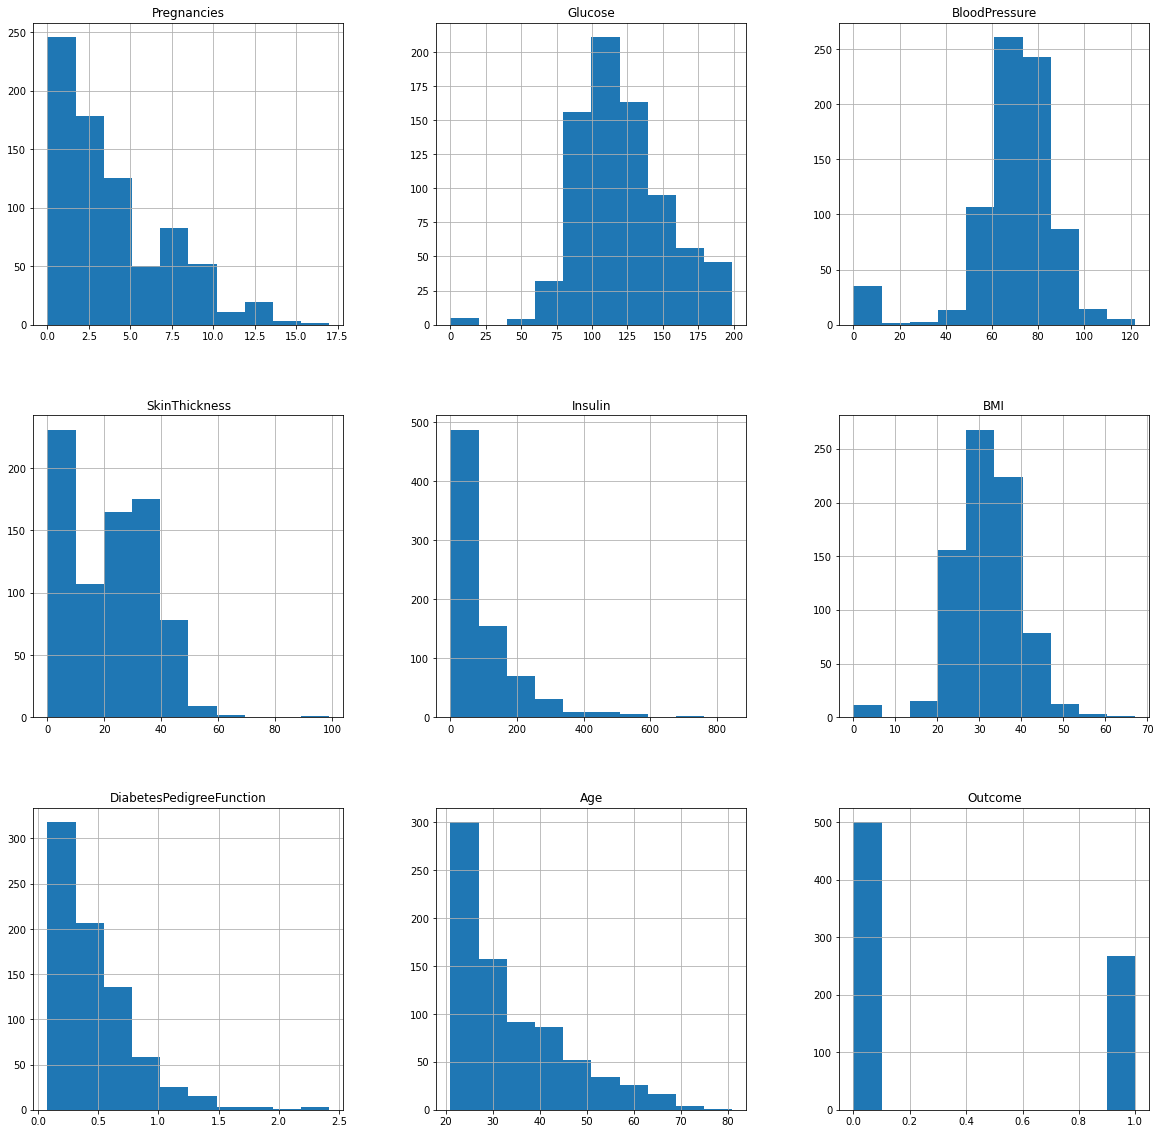

In [6]:
p = Pima_Diabetes.hist(figsize = (20,20))

This Bar-graph shows comparison between diabetes and non- diabetes patients.

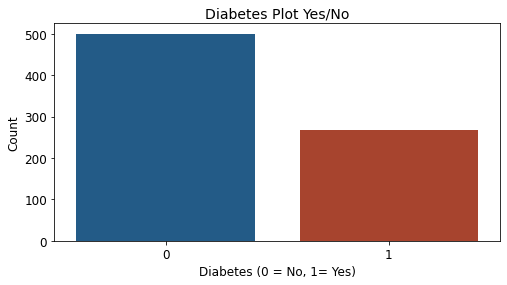

In [7]:
plt.figure(figsize=(8,4))
plt.title('Diabetes Plot Yes/No', fontsize=14)
sns.countplot(x="Outcome", data=Pima_Diabetes, palette=('#125d98','#bb371a'))
plt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

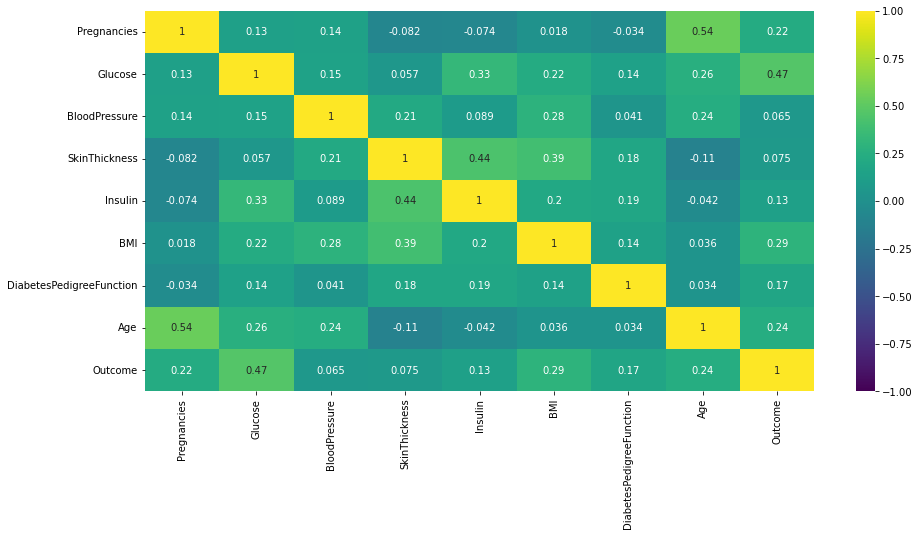

In [8]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,7))
sns.heatmap(Pima_Diabetes.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()

Creating numpy arrays for features and target

In [11]:
X = Pima_Diabetes.drop('Outcome',axis=1).values
y = Pima_Diabetes['Outcome'].values

# Spliting  the data randomly into training and test set.

Let's split the data randomly into training and test set.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

Let's create a classifier using k-Nearest Neighbors algorithm.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

#this store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #using training data to get the accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #using test data to get the accuracy
    test_accuracy[i] = knn.score(X_test, y_test)

Using the test_accuracy and train_accuracy to find the k-neighbors value

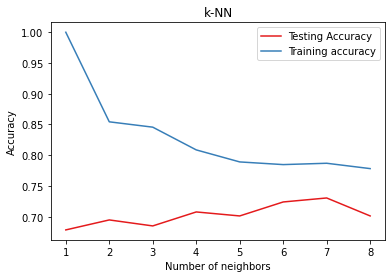

In [15]:
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Using n_neighbor value to KNN.

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

## Predicting Knn Score using test data

In [15]:
print("Accuracy for K-nearest neighbors (KNN) algorithm:",knn.score(X_test,y_test))

Accuracy for K-nearest neighbors (KNN) algorithm: 0.7305194805194806


## Confusion matrix 
making predictions using the classifier we had fit above

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]], dtype=int64)

From this matrix, we can find that there are 165-True postive, 36-False Positive, 47-False Negative and 60-True negative values.

## Random Forest Classifier 

In [21]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini", min_samples_leaf = 1,min_samples_split = 10,n_estimators=100, 
                                       max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_pred, y_test)

print("Accuracy for Random forest classifer:",accuracy_score(y_test, y_pred))

Accuracy for Random forest classifer: 0.737012987012987
